<a href="https://colab.research.google.com/github/bmaged23/EDA/blob/main/EDA_and_ML_for_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d saurabhbadole/breast-cancer-wisconsin-state

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/breast-cancer-wisconsin-state
License(s): other
breast-cancer-wisconsin-state.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("/content/breast-cancer-wisconsin-state.zip","r") as file:
  file.extractall("/content/breast-cancer-wisconsin-state")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="/content/breast-cancer-wisconsin-state/breast-cancer-wisconsin.data"
df=pd.read_csv(url)
new_df=df
new_df = new_df.replace('?', np.nan)

new_df=new_df.drop_duplicates()

new_df=new_df.rename(columns={"1000025":"Sample code numbe","5":"Clump Thickness","1":"Uniformity of Cell Size","1.1":"Uniformity of Cell Shape","1.2":"Marginal Adhesion","2":"Single Epithelial Cell Size","1.3":"Bare Nuclei","3":"Bland Chromatin","1.4":"Normal Nucleoli","1.5":"Mitoses","2.1":"Class"})

new_df

,Sample code numbe,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
#new_df=new_df.drop(columns=["Sample code numbe"])

In [ ]:
print(new_df.isna().sum())
new_df.info()

Sample code numbe               0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code numbe            690 non-null    int64 
 1   Clump Thickness              690 non-null    int64 
 2   Uniformity of Cell Size      690 non-null    int64 
 3   Uniformity of Cell Shape     690 non-null    int64 
 4   Marginal Adhesion            690 non-null    int64 
 5   Single Epithelial Cell Size  690 non-null    int64 
 6   Bare Nuclei                  674 non-null    object


In [ ]:
new_df.describe()

,Sample code numbe,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.073440e+06,4.426087,3.133333,3.204348,2.827536,3.213043,3.436232,2.885507,1.594203,2.689855
std,6.197382e+05,2.817819,3.042451,2.960844,2.867787,2.200964,2.444060,3.067682,1.724230,0.951379
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.720490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171752e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238450e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
print(new_df["Bare Nuclei"].isna().sum())
new_df["Bare Nuclei"] = new_df["Bare Nuclei"].fillna(new_df["Bare Nuclei"].mode()[0])
new_df["Bare Nuclei"]=new_df["Bare Nuclei"].astype("int")
new_df.info()

16
<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code numbe            690 non-null    int64
 1   Clump Thickness              690 non-null    int64
 2   Uniformity of Cell Size      690 non-null    int64
 3   Uniformity of Cell Shape     690 non-null    int64
 4   Marginal Adhesion            690 non-null    int64
 5   Single Epithelial Cell Size  690 non-null    int64
 6   Bare Nuclei                  690 non-null    int64
 7   Bland Chromatin              690 non-null    int64
 8   Normal Nucleoli              690 non-null    int64
 9   Mitoses                      690 non-null    int64
 10  Class                        690 non-null    int64
dtypes: int64(11)
memory usage: 64.7 KB


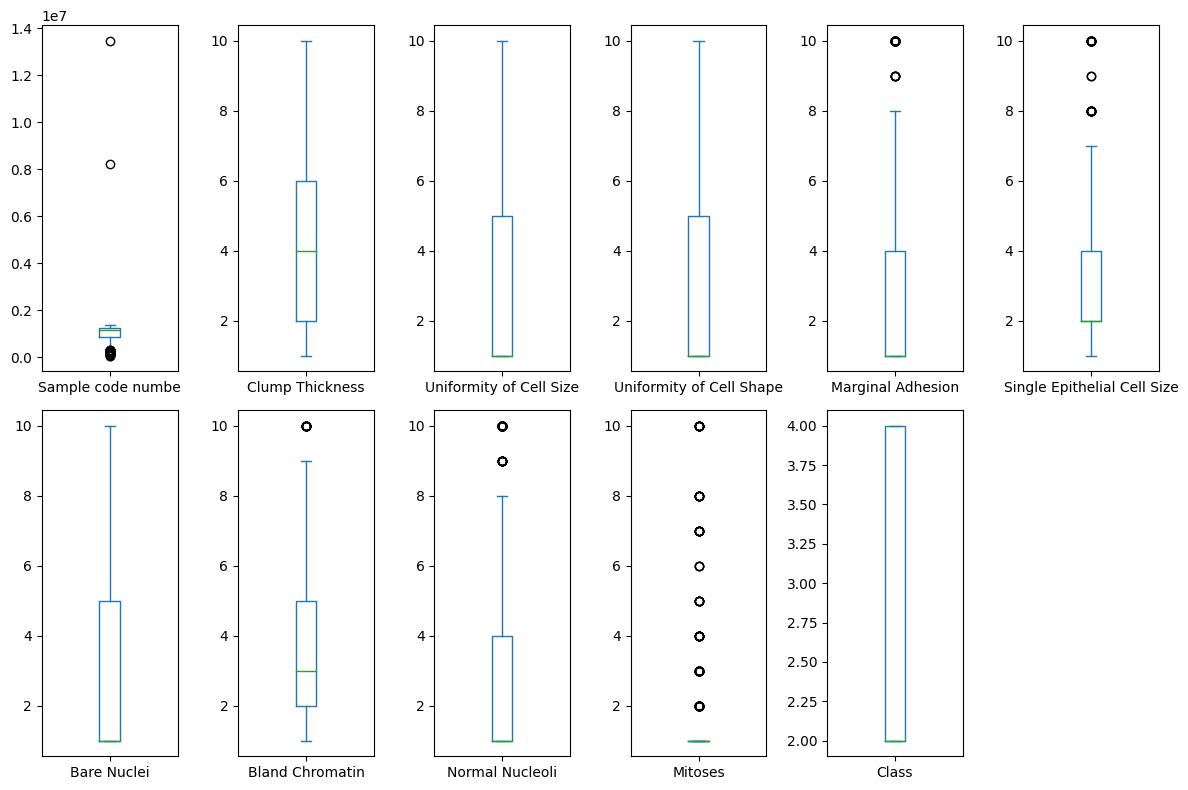

In [ ]:
new_df.plot(kind='box', subplots=True, layout=(2, -1), figsize=(12, 8))
plt.tight_layout()
plt.show()

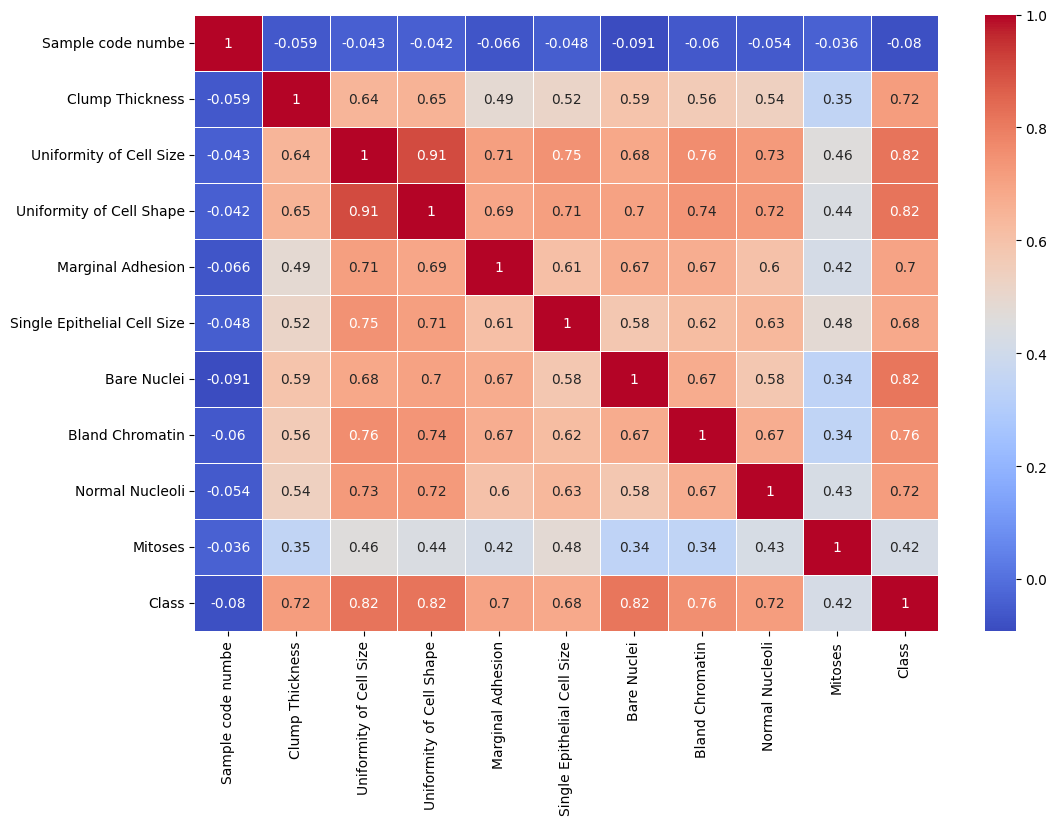

In [ ]:
import seaborn as sns
num_df=new_df.select_dtypes(include=["number"])
correlation=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
'''new_df=new_df.drop(columns=["Uniformity of Cell Size","Uniformity of Cell Shape"])
num_df=new_df.select_dtypes(include=["number"])
correlation=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()'''
new_df=new_df.drop(columns=["Sample code numbe"])

In [ ]:
col=list(new_df.columns)
for cl in col:
  print(cl)
  print(new_df[cl].unique())

Clump Thickness
[ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size
[ 4  1  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape
[ 4  1  8 10  2  3  5  6  7  9]
Marginal Adhesion
[ 5  1  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size
[ 7  2  3  1  6  4  5  8 10  9]
Bare Nuclei
[10  2  4  1  3  9  7  5  8  6]
Bland Chromatin
[ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli
[ 2  1  7  4  5  3 10  6  9  8]
Mitoses
[ 1  5  4  2  3  7 10  8  6]
Class
[2 4]


In [ ]:
new_df.loc[new_df["Class"] == 2, "Class"] = 0
new_df.loc[new_df["Class"] == 4, "Class"] = 1

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming new_df is your DataFrame
Y = new_df["Class"]  # Target variable
X = new_df.iloc[:, :-1]  # Select all columns except the last one for features

# Standardize the features
scaler = StandardScaler()
'''X_scaled = scaler.fit_transform(X)  # Standardize features

# Convert scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)'''

# Display the first few rows to check the scaled features
print(X_scaled_df.head())
print(Y)

   Sample code numbe  Clump Thickness  Uniformity of Cell Size  \
0          -0.113832         0.203821                 0.285065   
1          -0.093679        -0.506463                -0.701698   
2          -0.092304         0.558962                 1.600748   
3          -0.091099        -0.151321                -0.701698   
4          -0.090939         1.269246                 2.258590   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                  0.268920           0.758090                     1.721838   
1                 -0.745040          -0.637726                    -0.551542   
2                  1.620866          -0.637726                    -0.096866   
3                 -0.745040           0.060182                    -0.551542   
4                  2.296839           1.804951                     1.721838   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli   Mitoses  
0     1.803153        -0.178616        -0.288866 -0.344869  
1    -

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

model=SVC(class_weight={0:50,1:100})
model.fit(X,Y)
y_pred_train=model.predict(x_train)
print(accuracy_score(y_train,y_pred_train))
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        52

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [ ]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,Y)
y_pred_train=model.predict(x_train)
print(accuracy_score(y_train,y_pred_train))
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9692028985507246
0.9637681159420289
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.94      0.96      0.95        52

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



Class
0    452
1    238
Name: count, dtype: int64


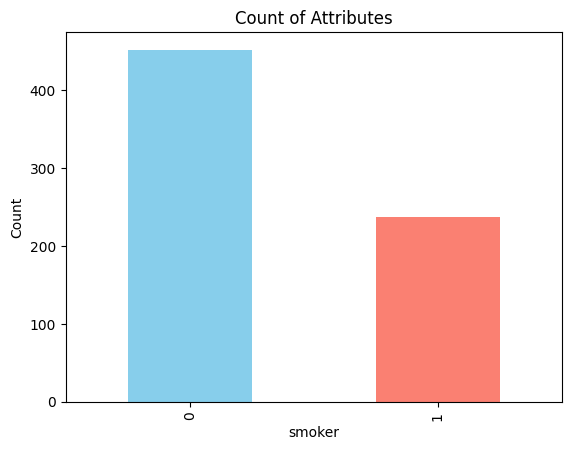

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bar_df = new_df['Class'].value_counts()
print(bar_df)
bar_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Attributes')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()